# Grid Cells

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import line_aa
from scipy.stats import multivariate_normal
from grid_cells import *
from utils import gaussian_grid, get_coords, device
from tqdm import tqdm


def dist(w, probs, place):
    return np.sum((probs.T @ w - place)**2 * (place + 0.1))

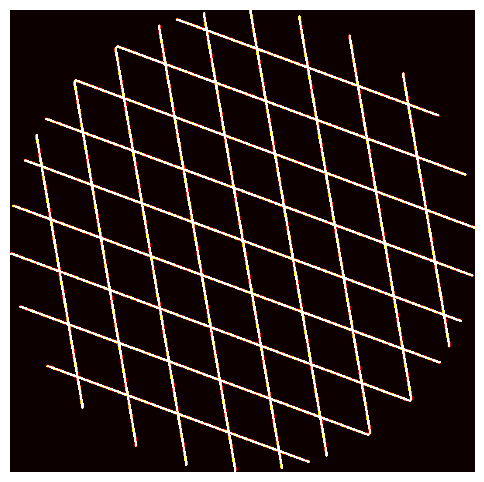

In [2]:
angle = np.random.uniform(0, 2 * np.pi / 3)
period = 60
radius = 300

z = np.any([zeros_with_line(*line_aa(*l), shape=[2 * radius + 1] * 2)
            for l in lines_at_60(angle, period, radius)], axis=0)

plt.figure(figsize=(6, 6))
plt.contourf(z, levels=100, cmap='hot')
plt.axis('off')
plt.show()

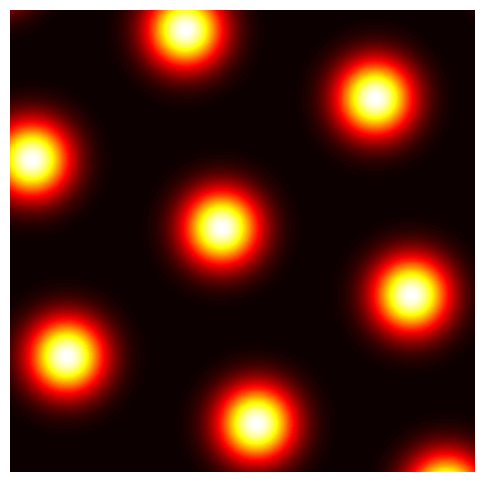

In [3]:
plt.figure(figsize=(6, 6))
plt.contourf(get_grid_cell(150), levels=100, cmap='hot')
plt.axis('off')
plt.show()

In [4]:
resolution = 400
MIN, MAX = -1, 1

coords = get_coords(resolution, MIN, MAX)

In [5]:
coord = [0, 0]
mvn = multivariate_normal(mean=coord, cov=np.eye(2) * 0.001)
place = gaussian_grid(coords, [mvn])
place /= place.max()

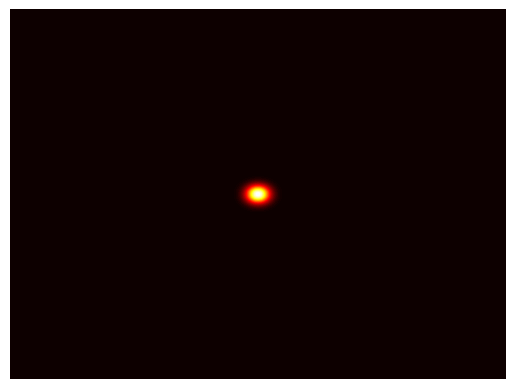

In [6]:
plt.contourf(place, levels=100, cmap='hot')
plt.axis('off')
plt.show()

In [7]:
N = 10

grid_cells = get_grid_cells(np.linspace(40, 150, 11), N, resolution)
grid_cells = purge_delinquent_cells(grid_cells)

In [8]:
p = torch.tensor(grid_cells, dtype=torch.float32, device=device)
w = torch.randn(grid_cells.shape[-1], requires_grad=True, device=device)
pl = torch.tensor(place, dtype=torch.float32, device=device)
lr = 1e-5

for _ in tqdm(range(10000)):
    loss = torch.sum((p @ w - pl)**2 * (pl + 0.1))
    loss.backward(inputs=[w])
    w = w - lr * w.grad

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:28<00:00, 355.89it/s]


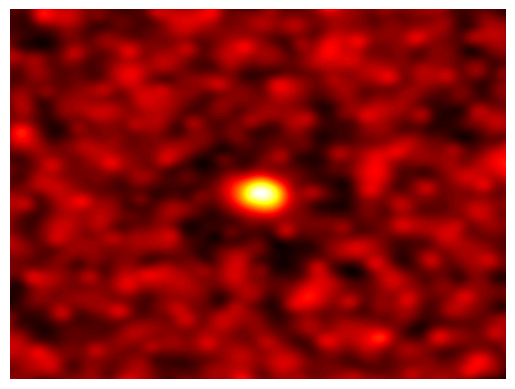

In [9]:
plt.contourf((p @ w).detach().cpu(), levels=100, cmap='hot')
plt.axis('off')
plt.show()

In [10]:
coord = [-.5, -.5]
mvn = multivariate_normal(mean=coord, cov=np.eye(2) * 0.01)
place = gaussian_grid(coords, [mvn])
place /= place.max()

In [11]:
p = torch.tensor(grid_cells, dtype=torch.float32, device=device)
w = torch.randn(grid_cells.shape[-1], requires_grad=True, device=device)
pl = torch.tensor(place, dtype=torch.float32, device=device)
lr = 1e-5

for _ in tqdm(range(10000)):
    loss = torch.sum((p @ w - pl)**2 * (pl + 0.1))
    loss.backward(inputs=[w])
    w = w - lr * w.grad

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:27<00:00, 358.20it/s]


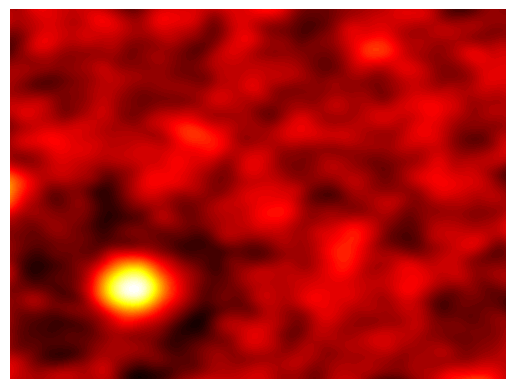

In [12]:
plt.contourf((p @ w).detach().cpu(), levels=100, cmap='hot')
plt.axis('off')
plt.show()